# Using FASTTEXT Embedings for Classifcation

# Imports

In [1]:
import os
from pathlib import Path
import re
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [2]:
directory = Path(os.path.abspath('')).parents[0]
sample_data_dir = os.path.join(directory,"data/rvl_cdip_1000_samples")
temp_data_dir = os.path.join(directory,"data/temp")
processed_data_dir = os.path.join(directory,"data/processed")
output_folder_dir = os.path.join(directory,"data/temp")



datasets_data_dir = os.path.join(directory,"data/datasets")

# df = pd.read_csv(datasets_data_dir+'/train_dataset_transformers.csv')
df = pd.read_csv(datasets_data_dir+'/train_dataset_fasttext.csv')


In [3]:
df.head()

,image,image_class,sentences_count,characters_count,count_words,duplicates_count,chars_excl_spaces_count,whole_numbers_count,alpha_numeric_count,punctuations_count,...,embed_feature_291.1,embed_feature_292.1,embed_feature_293.1,embed_feature_294.1,embed_feature_295.1,embed_feature_296.1,embed_feature_297.1,embed_feature_298.1,embed_feature_299.1,embed_feature_300.1
0,image_0794.png,0,12,2256,346,37,1937,42,1852,84,...,0.004752,0.090244,-0.258705,-0.048917,0.059552,-0.022756,-0.069099,-0.011067,-0.015744,-0.021254
1,image_0757.png,0,3,1593,218,35,1394,18,1350,44,...,0.005067,0.096301,-0.263418,-0.048967,0.057934,-0.020269,-0.067898,-0.015830,-0.015075,-0.023132
2,image_0395.png,0,3,862,142,22,754,14,703,51,...,0.017388,0.089056,-0.260882,-0.052369,0.046714,-0.017506,-0.056810,-0.016768,-0.011290,-0.020425
3,image_0427.png,0,9,1524,264,29,1289,11,1240,49,...,0.001674,0.096006,-0.256580,-0.045821,0.063269,-0.023583,-0.073975,-0.016984,-0.018870,-0.023592
4,image_0552.png,0,2,1889,311,21,1611,11,1562,49,...,0.001651,0.103438,-0.269712,-0.044465,0.065363,-0.025036,-0.079793,-0.011943,-0.019505,-0.020772


# Selecting Data Fields

In [4]:

df_train = df[df.columns.difference(['image','image_cass'])]
df_train.head()


,alpha_numeric_count,characters_count,chars_excl_spaces_count,count_words,duplicates_count,embed_feature_1,embed_feature_1.1,embed_feature_10,embed_feature_10.1,embed_feature_100,...,embed_feature_99.1,image_class,noun_phase_count,punctuations_count,sentences_count,sentiment_polarity_score,sentiment_subjectivity_score,spelling_quality_score,stop_words_count,whole_numbers_count
0,1852,2256,1937,346,37,0.028762,0.028762,-0.046451,-0.046451,-0.050096,...,-0.047567,0,159,84,12,0.130000,0.445741,0.700906,78,42
1,1350,1593,1394,218,35,0.032041,0.032041,-0.033922,-0.033922,-0.053905,...,-0.053092,0,122,44,3,0.103788,0.290404,0.807882,31,18
2,703,862,754,142,22,0.038395,0.038395,-0.033350,-0.033350,-0.045483,...,-0.055438,0,46,51,3,0.291667,0.345833,0.758929,33,14
3,1240,1524,1289,264,29,0.024923,0.024923,-0.049972,-0.049972,-0.054586,...,-0.041318,0,94,49,9,-0.289048,0.647619,0.824490,99,11
4,1562,1889,1611,311,21,0.028049,0.028049,-0.050536,-0.050536,-0.055773,...,-0.053367,0,159,49,2,0.289881,0.372173,0.589286,67,11


In [5]:
df_label = df['image_class']
df_label

0      0
1      0
2      0
3      0
4      0
      ..
995    9
996    9
997    9
998    9
999    9
Name: image_class, Length: 1000, dtype: int64

# Train - Test  Split

In [6]:
from sklearn.model_selection import train_test_split

train_df, test_df,y_train,y_test  = train_test_split(df_train,df_label, test_size=0.25)

print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

train shape:  (750, 614)
test shape:  (250, 614)
y_train shape:  (750,)
y_test shape:  (250,)


# Model Selection

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
# from pandas.tools.plotting import scatter_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
%matplotlib inline

In [8]:
#evaluation - baselines
num_folds = 10
seed = 13
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('XGB', XGBClassifier()))


results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, train_df.to_numpy(),y_train.to_numpy(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f %f " % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR 0.361333 0.065983 
LDA 0.473333 0.075953 
KNN 0.281333 0.046743 
ABC 0.426667 0.117151 
RFC 0.538667 0.071355 
ETC 0.509333 0.062197 
XGB 0.998667 0.004000 


# Model Traning

In [9]:
model = XGBClassifier()
model.fit(train_df.to_numpy(), y_train.to_numpy(), 
          eval_set=[(train_df.to_numpy(), y_train.to_numpy()), (test_df.to_numpy(), y_test.to_numpy())], 
          early_stopping_rounds=10)

[0]	validation_0-mlogloss:1.11432	validation_1-mlogloss:1.16329
[1]	validation_0-mlogloss:0.77013	validation_1-mlogloss:0.83266
[2]	validation_0-mlogloss:0.55469	validation_1-mlogloss:0.62730
[3]	validation_0-mlogloss:0.40616	validation_1-mlogloss:0.47988
[4]	validation_0-mlogloss:0.30111	validation_1-mlogloss:0.36856
[5]	validation_0-mlogloss:0.22506	validation_1-mlogloss:0.28821
[6]	validation_0-mlogloss:0.16963	validation_1-mlogloss:0.22788
[7]	validation_0-mlogloss:0.12907	validation_1-mlogloss:0.18277
[8]	validation_0-mlogloss:0.09888	validation_1-mlogloss:0.14705
[9]	validation_0-mlogloss:0.07660	validation_1-mlogloss:0.11976
[10]	validation_0-mlogloss:0.06015	validation_1-mlogloss:0.09864
[11]	validation_0-mlogloss:0.04819	validation_1-mlogloss:0.08310
[12]	validation_0-mlogloss:0.03933	validation_1-mlogloss:0.07144
[13]	validation_0-mlogloss:0.03260	validation_1-mlogloss:0.06160
[14]	validation_0-mlogloss:0.02741	validation_1-mlogloss:0.05275
[15]	validation_0-mlogloss:0.02370	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [10]:
y_pred = model.predict(train_df.to_numpy())

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score ,f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_metrics(actual, pred):

    r2 = r2_score(actual, pred)
    f1 = f1_score(actual, pred,average='micro')
    accuracy = accuracy_score(actual, pred)
    precision = precision_score(actual, pred, average='micro')
    recall = recall_score(actual, pred,average='micro')
    
    print('R2 Score:', r2)
    print('F1 Score:', f1)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    

In [12]:
eval_metrics(y_train,y_pred)

R2 Score: 1.0
F1 Score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred = model.predict(test_df.to_numpy())
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

plt.show()

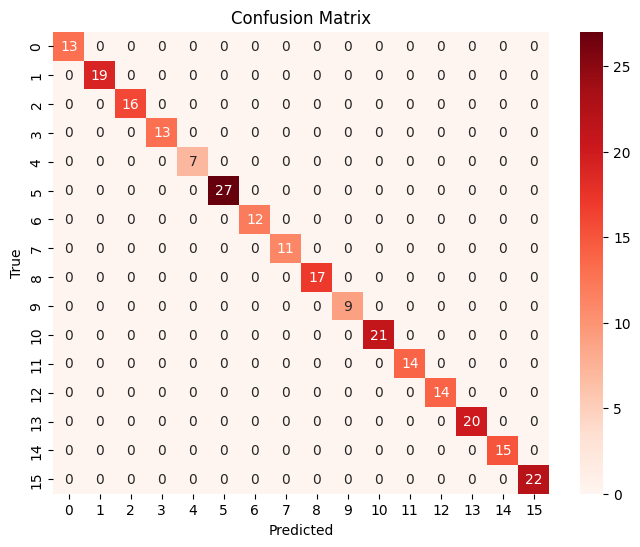

In [14]:
import seaborn as sns
title='Confusion Matrix'
y_pred = model.predict(test_df.to_numpy())
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
    
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d',cmap='Reds')
plt.title(title)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature Importance

In [15]:
imp_score = {}
feature_list = list(df_train.columns)
for idx,score in enumerate(model.feature_importances_):
    imp_score[feature_list[idx]]=score
    
feats_importance = pd.DataFrame(imp_score.items(),columns = ['feature_name','score'])
feats_importance.sort_values(by='score',ascending=False)

,feature_name,score
1,characters_count,0.235867
107,embed_feature_145,0.122356
3,count_words,0.103312
417,embed_feature_285,0.074445
47,embed_feature_118,0.072836
...,...,...
235,embed_feature_202,0.000000
234,embed_feature_201.1,0.000000
233,embed_feature_201,0.000000
232,embed_feature_200.1,0.000000


In [16]:
feats_importance[feats_importance['score']==0]

,feature_name,score
5,embed_feature_1,0.0
6,embed_feature_1.1,0.0
8,embed_feature_10.1,0.0
9,embed_feature_100,0.0
10,embed_feature_100.1,0.0
...,...,...
601,embed_feature_98,0.0
602,embed_feature_98.1,0.0
603,embed_feature_99,0.0
604,embed_feature_99.1,0.0
